In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
data = pd.read_csv("heart-disease.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


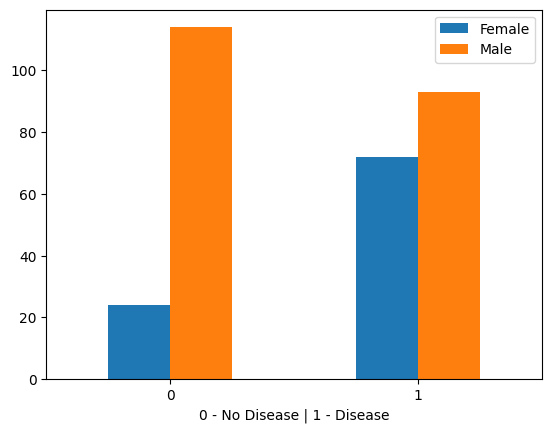

In [4]:
pd.crosstab(data["target"], data["sex"]).plot(kind="bar")

plt.legend(["Female", "Male"])
plt.xticks(rotation=0)
plt.xlabel("0 - No Disease | 1 - Disease");

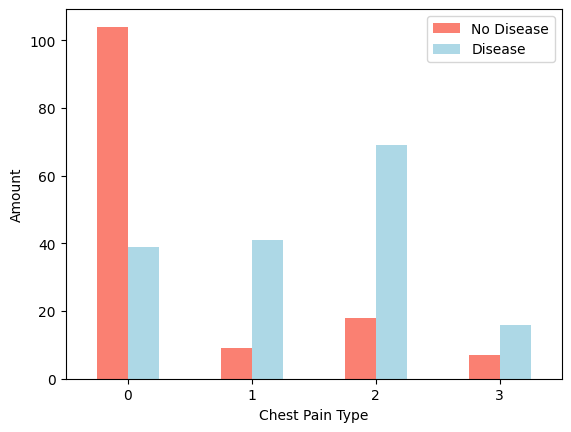

In [5]:
pd.crosstab(data["cp"], data["target"]).plot(kind="bar", color=["salmon", "lightblue"])

plt.legend(["No Disease", "Disease"])
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.xticks(rotation=0);

In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


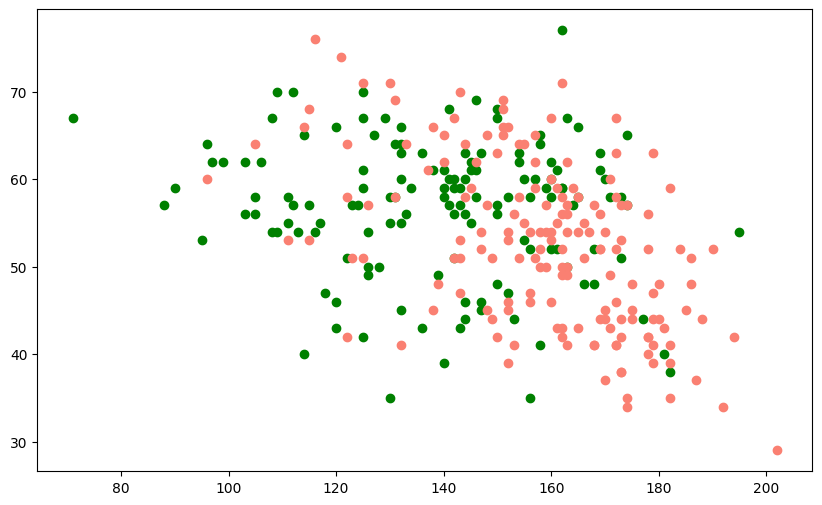

In [7]:
plt.figure(figsize=(10, 6))

plt.scatter(data.thalach[data.target==0], 
            data.age[data.target==0],
            color="green")

plt.scatter(data.thalach[data.target==1],
            data.age[data.target==1],
            color="salmon");

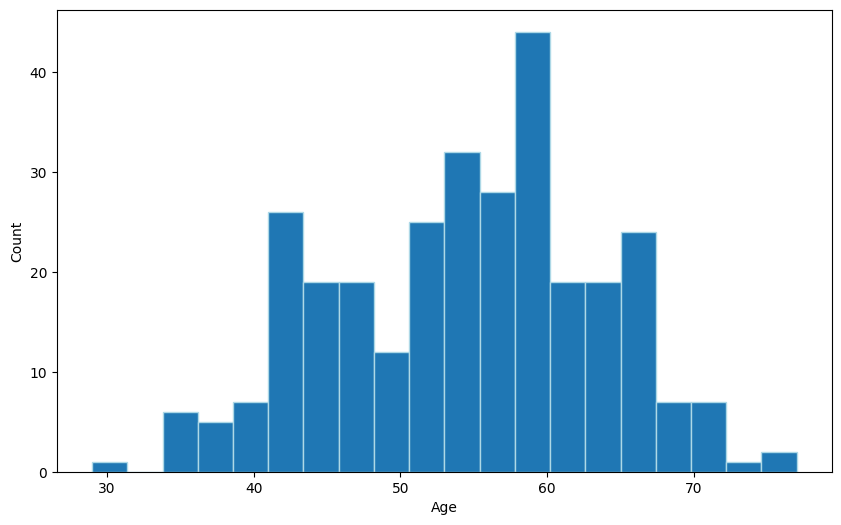

In [8]:
plt.figure(figsize=(10, 6))

plt.hist(data["age"], bins=20, edgecolor="lightblue")
plt.xlabel("Age")
plt.ylabel("Count");

In [9]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


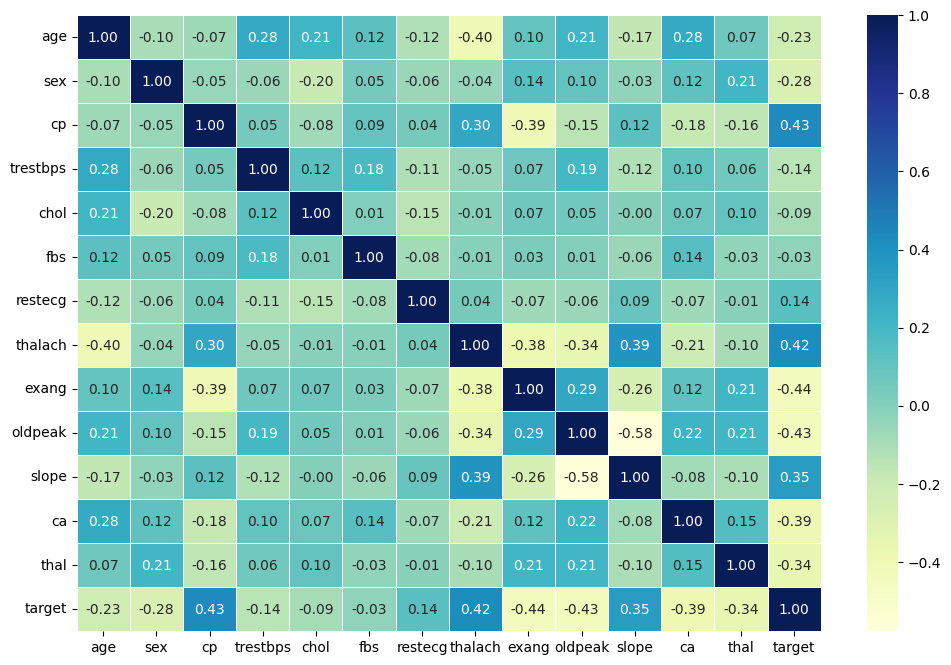

In [10]:
corr_matrix = data.corr()

fig, ax = plt.subplots(figsize=(12, 8))

ax = sns.heatmap(corr_matrix, 
                 annot=True,
                 linewidths=0.5,
                 cmap="YlGnBu",
                 fmt=".2f")

In [11]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
X = data.drop("target", axis=1)
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
models = {"Logistic Regression": LogisticRegression(max_iter=1000),
          "Random Forest Classifier": RandomForestClassifier(),
          "K-Neighbours Classifier": KNeighborsClassifier(n_neighbors=7)}

In [16]:
def fit_and_evaluate_models(models, X_train, y_train, X_test, y_test):
    np.random.seed(42)
    # Fits and Evaluates all provided models
    model_scores = {}
    
    for name, model in models.items():
        # Fitting the Model
        model.fit(X_train, y_train)
        # Adding model score to the model_score dict
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [17]:
scores = fit_and_evaluate_models(models, X_train, y_train, X_test, y_test)

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [18]:
scores

{'Logistic Regression': 0.8360655737704918,
 'Random Forest Classifier': 0.8032786885245902,
 'K-Neighbours Classifier': 0.6885245901639344}

In [19]:
scores_data = pd.DataFrame(scores, index=["Accuracy"])

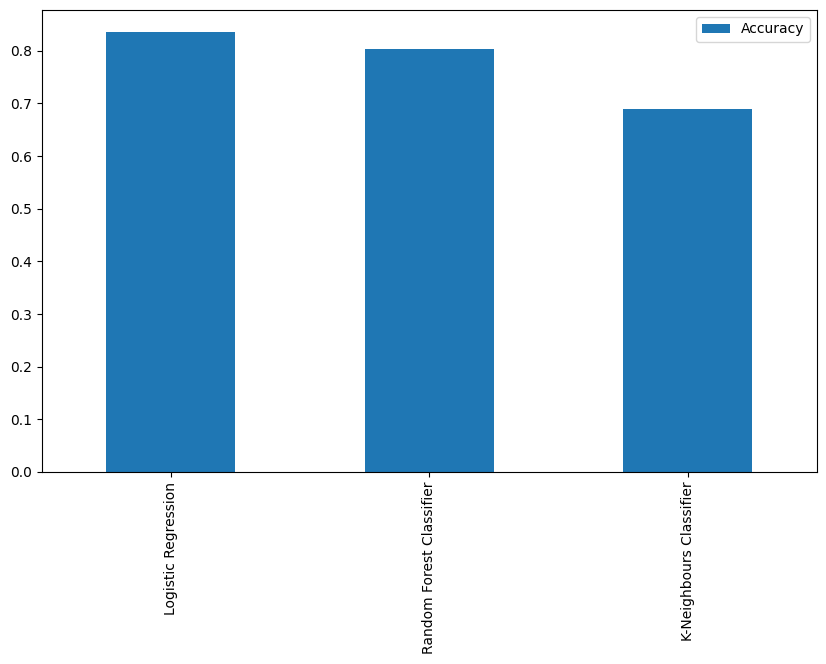

In [20]:
scores_data.T.plot(kind="bar", figsize=(10, 6));

In [21]:
neighbors = range(1, 21)

In [22]:
knn = KNeighborsClassifier()

train_scores = []
test_scores = []

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

Max Score on Test Data: 0.77%


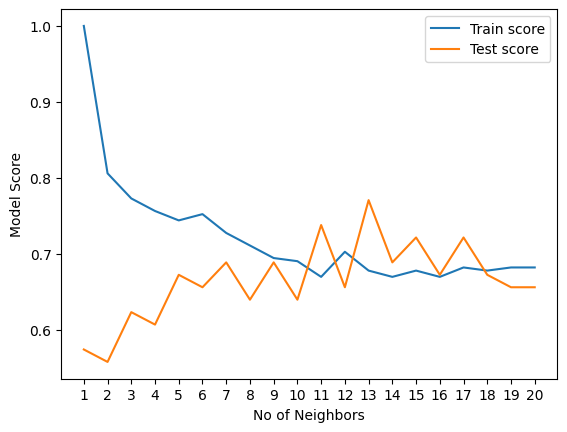

In [23]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xlabel("No of Neighbors")
plt.ylabel("Model Score")
plt.xticks(range(1, 21, 1))
plt.legend();

print(f"Max Score on Test Data: {max(test_scores):.2f}%")

In [24]:
# log_reg_grid = {"C": np.logspace(-4, 4, 20),
#                 "solver": ["liblinear"]}

log_reg_grid = {'penalty': ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 50),
              'solver': ['liblinear'],
              'max_iter'  : [100, 1000, 2500, 5000]}

ran_for_grid = {"n_estimators": np.arange(10, 1000, 50),
                "max_depth": [None, 3, 5, 10],
                "min_samples_split": np.arange(2, 20, 2),
                "min_samples_leaf": np.arange(1, 20, 2)}

In [25]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

np.random.seed(42)

model = LogisticRegression()

rs_log_reg = RandomizedSearchCV(model,
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=100,
                                verbose=2)

In [26]:
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END C=1.7575106248547894, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.7575106248547894, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.7575106248547894, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.7575106248547894, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.7575106248547894, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=51.79474679231202, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=51.79474679231202, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=51.79474679231202, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=51.79474679231202, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=51.79474679231202, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[C

[CV] END C=3.727593720314938, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=6866.488450042998, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=6866.488450042998, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=6866.488450042998, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=6866.488450042998, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=6866.488450042998, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0029470517025518097, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0029470517025518097, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0029470517025518097, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0029470517025518097, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0029470517025518097, max_iter=2500, 

[CV] END C=0.12648552168552957, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.12648552168552957, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.12648552168552957, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.05963623316594643, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.05963623316594643, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.05963623316594643, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.05963623316594643, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.05963623316594643, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=4714.8663634573895, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=4714.8663634573895, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=4714.8663634573895, max_iter=25

[CV] END C=0.12648552168552957, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.12648552168552957, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.12648552168552957, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.12648552168552957, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.02811768697974228, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.02811768697974228, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.02811768697974228, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.02811768697974228, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.02811768697974228, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=75.43120063354607, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=75.43120063354607, max_iter=5000, p

[CV] END C=35.564803062231285, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=35.564803062231285, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=35.564803062231285, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=35.564803062231285, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0013894954943731374, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0013894954943731374, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0013894954943731374, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0013894954943731374, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0013894954943731374, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=11.513953993264458, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=11.513953993264458, max_i

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-...
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                                        'max_iter': [100, 1000, 2500, 5000],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   verbose=2)

In [27]:
rs_log_reg.score(X_test, y_test)

0.8688524590163934

In [28]:
rs_log_reg.best_params_

{'solver': 'liblinear',
 'penalty': 'l1',
 'max_iter': 2500,
 'C': 0.2682695795279725}

In [29]:
np.random.seed(42)

model_2 = RandomForestClassifier()

rs_ran_for = RandomizedSearchCV(model_2,
                                param_distributions=ran_for_grid,
                                cv=5,
                                n_iter=50,
                                verbose=2)

In [30]:
rs_ran_for.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.4s
[CV] END max_de

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=

[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=210; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=210; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=210; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=2, n_esti

[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=10, n_estimators=410; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=10, n_estimators=410; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=16, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=16, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=16, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=16, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=16, n_estimators=110; total time=   0.0s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [31]:
rs_ran_for.score(X_test, y_test)

0.819672131147541

In [32]:
rs_ran_for.best_params_

{'n_estimators': 560,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [33]:
log_reg_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
                'C' : np.logspace(-4, 4, 50),
                'solver': ['lbfgs', 'newton-cg', 'liblinear'],
                'max_iter'  : [100, 1000, 2500, 5000]}

ran_for_grid = {"n_estimators": np.arange(10, 1000, 50),
                "max_depth": [None, 3, 5, 10],
                "min_samples_split": np.arange(2, 20, 2),
                "min_samples_leaf": np.arange(1, 20, 2)}

In [34]:
model = LogisticRegression()

gs_log_reg = GridSearchCV(model,
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=2)

In [179]:
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits
[CV] END ...C=0.0001, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.0001, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.0001, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.0001, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.0001, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, max_iter=100, penal

[CV] END C=0.0001, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0

[CV] END C=0.00014563484775012445, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.00014563484775012445, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.00014563484775012445, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.00014563484775012445, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.00014563484775012445, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.00014563484775012445, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.00014563484775012445, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.00014563484775012445, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.00014563484775012445, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.00014563484775012445, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.00014563484775012

[CV] END C=0.00014563484775012445, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.00014563484775012445, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.00014563484775012445, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.00014563484775012445, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.00014563484775012445, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.00014563484775012445, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.00014563484775012445, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.00014563484775012445, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.00014563484775012445, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.00014563484775012445, max_iter=5000, penalty=elasticnet, solver=lbfgs; total tim

[CV] END C=0.00021209508879201905, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.00021209508879201905, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.00021209508879201905, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.00021209508879201905, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.00021209508879201905, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.00021209508879201905, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.00021209508879201905, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.00021209508879201905, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.00021209508879201905, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.00021209508879201905, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.00021209508879201

[CV] END C=0.00030888435964774815, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.00030888435964774815, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.00030888435964774815, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.00030888435964774815, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.00030888435964774815, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.00030888435964774815, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.00030888435964774815, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.00030888435964774815, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.00030888435964774815, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.00030888435964774815, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0003088

[CV] END C=0.00030888435964774815, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.00030888435964774815, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.00030888435964774815, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.00030888435964774815, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.00030888435964774815, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.00030888435964774815, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.00030888435964774815, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.00030888435964774815, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.00030888435964774815, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.00030888435964774815, max_iter=2500, penalty=elasticnet, sol

[CV] END C=0.0004498432668969444, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0004498432668969444, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0004498432668969444, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0004498432668969444, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0004498432668969444, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0004498432668969444, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0004498432668969444, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0004498432668969444, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0004498432668969444, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.0004498432668969444, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=  

[CV] END C=0.0004498432668969444, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0004498432668969444, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0004498432668969444, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0004498432668969444, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0004498432668969444, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0004498432668969444, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.0004498432668969444, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.0004498432668969444, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.0004498432668969444, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.0004498432668969444, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.0004498432668969444, max_it

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=0.0006551285568595509, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006551285568595509, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006551285568595509, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006551285568595509, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006551285568595509, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006551285568595509, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006551285568595509, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006551285568595509, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006551285568595509, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006551285568595509, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006551285568595509, max_it

[CV] END C=0.0006551285568595509, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006551285568595509, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006551285568595509, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006551285568595509, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006551285568595509, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006551285568595509, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006551285568595509, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006551285568595509, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006551285568595509, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006551285568595509, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006551285568595509

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END C=0.0009540954763499944, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.0009540954763499944, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0009540954763499944, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0009540954763499944, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0009540954763499944, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0009540954763499944, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0009540954763499944, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0009540954763499944, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0009540954763499944, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0009540954763499944, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0009540954763499944, 

[CV] END C=0.0009540954763499944, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0009540954763499944, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0009540954763499944, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0009540954763499944, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0009540954763499944, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0009540954763499944, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0009540954763499944, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0009540954763499944, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0009540954763499944, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0009540954763499944, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0009540

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=0.0013894954943731374, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0013894954943731374, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0013894954943731374, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0013894954943731374, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0013894954943731374, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0013894954943731374, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0013894954943731374, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0013894954943731374, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0013894954943731374, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0013894954943731374, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.00138

[CV] END C=0.0013894954943731374, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0013894954943731374, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0013894954943731374, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0013894954943731374, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0013894954943731374, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0013894954943731374, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0013894954943731374, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0013894954943731374, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0013894954943731374, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0013894954943731374, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=0.0020235896477251557, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0020235896477251557, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0020235896477251557, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0020235896477251557, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.0020235896477251557, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.0020235896477251557, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.0020235896477251557, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.0020235896477251557, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.0020235896477251557, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.0020235896477251557, max_iter=100, penalty=elasticnet,

[CV] END C=0.0020235896477251557, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0020235896477251557, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0020235896477251557, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0020235896477251557, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0020235896477251557, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0020235896477251557, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0020235896477251557, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0020235896477251557, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0020235896477251557, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0020235896477251557, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=0.0029470517025518097, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0029470517025518097, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0029470517025518097, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0029470517025518097, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0029470517025518097, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0029470517025518097, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0029470517025518097, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0029470517025518097, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0029470517025518097, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0029470517025518097, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0

[CV] END C=0.0029470517025518097, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0029470517025518097, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0029470517025518097, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0029470517025518097, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0029470517025518097, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0029470517025518097, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0029470517025518097, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0029470517025518097, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0029470517025518097, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0029470517025518097, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=0.004291934260128779, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.004291934260128779, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.004291934260128779, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.004291934260128779, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.004291934260128779, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004291934260128779, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004291934260128779, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004291934260128779, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004291934260128779, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004291934260128779, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.004291934260128779, max

[CV] END C=0.004291934260128779, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.004291934260128779, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.004291934260128779, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.004291934260128779, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.004291934260128779, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.004291934260128779, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.004291934260128779, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.004291934260128779, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004291934260128779, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004291934260128779, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004291934260128779, max_i

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=0.0062505519252739694, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.0062505519252739694, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.0062505519252739694, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.0062505519252739694, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.0062505519252739694, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.0062505519252739694, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0062505519252739694, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0062505519252739694, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0062505519252739694, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0062505519252739694, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0062505519252739694, max_iter=100, pe

[CV] END C=0.0062505519252739694, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.0062505519252739694, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.0062505519252739694, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.0062505519252739694, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.0062505519252739694, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0062505519252739694, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0062505519252739694, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0062505519252739694, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0062505519252739694, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0062505519252739694, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0062505519252739694, ma

[CV] END C=0.009102981779915217, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.009102981779915217, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.009102981779915217, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.009102981779915217, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.009102981779915217, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.009102981779915217, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.009102981779915217, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.009102981779915217, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.009102981779915217, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.009102981779915217, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.009102981779915217, max_iter=100, penalty=l2, s

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=0.009102981779915217, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.009102981779915217, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.009102981779915217, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.009102981779915217, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.009102981779915217, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.009102981779915217, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.009102981779915217, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.009102981779915217, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.009102981779915217, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.009102981779915217, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.009102981779915217, max_iter=1000, pe

[CV] END C=0.009102981779915217, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.009102981779915217, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.009102981779915217, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.009102981779915217, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.009102981779915217, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.009102981779915217, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.009102981779915217, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.009102981779915217, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.009102981779915217, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.009102981779915217, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.009102981779915217, max_iter=5000

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=0.013257113655901081, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.013257113655901081, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.013257113655901081, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.013257113655901081, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.013257113655901081, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.013257113655901081, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.013257113655901081, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.013257113655901081, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.013257113655901081, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.013257113655901081, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.013257113655901081, max_iter=1000, pe

[CV] END C=0.013257113655901081, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.013257113655901081, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.013257113655901081, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.013257113655901081, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.013257113655901081, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.013257113655901081, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.013257113655901081, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.013257113655901081, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.013257113655901081, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.013257113655901081, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.013257113655901081, max_iter=5000, pe

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=0.019306977288832496, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.019306977288832496, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.019306977288832496, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.019306977288832496, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.019306977288832496, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.019306977288832496, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.019306977288832496, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.019306977288832496, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.019306977288832496, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.019306977288832496, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.01930697728

[CV] END C=0.019306977288832496, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.019306977288832496, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.019306977288832496, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.019306977288832496, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.019306977288832496, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.019306977288832496, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.019306977288832496, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.019306977288832496, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.019306977288832496, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.019306977288832496, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=0.02811768697974228, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.02811768697974228, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.02811768697974228, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.02811768697974228, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.02811768697974228, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.02811768697974228, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.02811768697974228, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.02811768697974228, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.02811768697974228, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.02811768697974228, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.02811768697974228, max_iter=100, penalty=l2, solver=libli

[CV] END C=0.02811768697974228, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.02811768697974228, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.02811768697974228, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.02811768697974228, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.02811768697974228, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.02811768697974228, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.02811768697974228, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.02811768697974228, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.02811768697974228, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.02811768697974228, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.02811768697974228, max_iter=2500, penalty=l

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=0.040949150623804234, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.040949150623804234, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.040949150623804234, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.040949150623804234, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.040949150623804234, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.040949150623804234, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.040949150623804234, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.040949150623804234, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.040949150623804234, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.040949150623804234, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.040949150623804234, max_iter=100, penalty=l2, s

[CV] END C=0.040949150623804234, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.040949150623804234, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.040949150623804234, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.040949150623804234, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.040949150623804234, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.040949150623804234, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.040949150623804234, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.040949150623804234, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.040949150623804234, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.040949150623804234, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.040949150623804234, max_iter=

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=0.05963623316594643, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.05963623316594643, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.05963623316594643, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.05963623316594643, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.05963623316594643, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.05963623316594643, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.05963623316594643, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.05963623316594643, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.05963623316594643, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.05963623316594643, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.05963623316594643, max_iter=100, penalty=l2, 

[CV] END C=0.05963623316594643, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.05963623316594643, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.05963623316594643, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.05963623316594643, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.05963623316594643, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.05963623316594643, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.05963623316594643, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.05963623316594643, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.05963623316594643, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.05963623316594643, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.05963623316594643, max_iter=2500, p

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=0.08685113737513521, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.08685113737513521, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.08685113737513521, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.08685113737513521, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.08685113737513521, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.08685113737513521, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.08685113737513521, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.08685113737513521, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.08685113737513521, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.08685113737513521, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.08685113737513521, max_iter=100, penalty=l2, 

[CV] END C=0.08685113737513521, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.08685113737513521, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.08685113737513521, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.08685113737513521, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.08685113737513521, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.08685113737513521, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.08685113737513521, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.08685113737513521, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.08685113737513521, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.08685113737513521, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.08685113737513521, max_iter=2500, penalty=l

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=0.12648552168552957, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.12648552168552957, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.12648552168552957, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.12648552168552957, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.12648552168552957, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.12648552168552957, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.12648552168552957, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.12648552168552957, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.12648552168552957, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.12648552168552957, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.12648552168552957, max_iter=100, pena

[CV] END C=0.12648552168552957, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.12648552168552957, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.12648552168552957, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.12648552168552957, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.12648552168552957, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.12648552168552957, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.12648552168552957, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.12648552168552957, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.12648552168552957, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.12648552168552957, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.12648552168552957, max_iter=2500, penal

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=0.18420699693267145, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.18420699693267145, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.18420699693267145, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.18420699693267145, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.18420699693267145, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.18420699693267145, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.18420699693267145, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.18420699693267145, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.18420699693267145, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.18420699693267145, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.18420699693267145, ma

[CV] END C=0.18420699693267145, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.18420699693267145, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.18420699693267145, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.18420699693267145, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.18420699693267145, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.18420699693267145, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.18420699693267145, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.18420699693267145, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.18420699693267145, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.18420699693267145, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.18420699693267145, max_iter=5000, penalty=l2, s

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=0.2682695795279725, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.2682695795279725, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.2682695795279725, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.2682695795279725, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.2682695795279725, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.2682695795279725, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.2682695795279725, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.2682695795279725, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.2682695795279725, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.2682695795279725, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.2682695795279725, max_iter=100, penalty=l2, solver=liblinear; t

[CV] END C=0.2682695795279725, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.2682695795279725, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.2682695795279725, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.2682695795279725, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.2682695795279725, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.2682695795279725, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.2682695795279725, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.2682695795279725, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.2682695795279725, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.2682695795279725, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.2682695795279725, max_iter=2500, penalty=l2, solv

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=0.3906939937054613, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.3906939937054613, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.3906939937054613, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.3906939937054613, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.3906939937054613, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.3906939937054613, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.3906939937054613, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.3906939937054613, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.3906939937054613, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.3906939937054613, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.3906939937054613, max_iter=100, penalty=l2, solver=liblinear; total

[CV] END C=0.3906939937054613, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.3906939937054613, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.3906939937054613, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.3906939937054613, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.3906939937054613, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.3906939937054613, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.3906939937054613, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.3906939937054613, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.3906939937054613, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.3906939937054613, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.3906939937054613, max_iter=2500, penalty=l2, solver=l

[CV] END C=0.5689866029018293, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.5689866029018293, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.5689866029018293, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.5689866029018293, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.5689866029018293, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.5689866029018293, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.5689866029018293, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.5689866029018293, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.5689866029018293, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.5689866029018293, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.5689866029018293, max_iter=100, penalty=l2, solver=newton-cg; total

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=0.5689866029018293, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.5689866029018293, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.5689866029018293, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.5689866029018293, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.5689866029018293, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.5689866029018293, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.5689866029018293, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.5689866029018293, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.5689866029018293, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.5689866029018293, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.5689866029018293, max_iter=100,

[CV] END C=0.5689866029018293, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.5689866029018293, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.5689866029018293, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.5689866029018293, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.5689866029018293, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.5689866029018293, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.5689866029018293, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.5689866029018293, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.5689866029018293, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.5689866029018293, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.5689866029018293, max_ite

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=0.8286427728546842, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.8286427728546842, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.8286427728546842, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.8286427728546842, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.8286427728546842, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.8286427728546842, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.8286427728546842, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.8286427728546842, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.8286427728546842, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.8286427728546842, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.8286427728546842, max_iter=100, penalty=l2, solver=liblinear; t

[CV] END C=0.8286427728546842, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.8286427728546842, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.8286427728546842, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.8286427728546842, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.8286427728546842, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.8286427728546842, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.8286427728546842, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.8286427728546842, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.8286427728546842, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.8286427728546842, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.8286427728546842, max_iter=2500, penalty=l2, solver=l

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=1.2067926406393288, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.2067926406393288, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.2067926406393288, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.2067926406393288, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.2067926406393288, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.2067926406393288, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.2067926406393288, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.2067926406393288, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.2067926406393288, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1.2067926406393288, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1.2067926406393288, max_iter=100, penalty

[CV] END C=1.2067926406393288, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1.2067926406393288, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1.2067926406393288, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.2067926406393288, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.2067926406393288, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.2067926406393288, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.2067926406393288, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.2067926406393288, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.2067926406393288, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.2067926406393288, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.2067926406393288, max_iter=2500, penalty=l2, 

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=1.7575106248547894, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1.7575106248547894, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1.7575106248547894, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1.7575106248547894, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1.7575106248547894, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1.7575106248547894, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.7575106248547894, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.7575106248547894, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.7575106248547894, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.7575106248547894, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.7575106248547894, max_iter=100, penalty=l2, solver=liblinear; total

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END C=1.7575106248547894, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=1.7575106248547894, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.7575106248547894, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.7575106248547894, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.7575106248547894, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.7575106248547894, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.7575106248547894, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.7575106248547894, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.7575106248547894, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.7575106248547894, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.7575106248547894, max_iter=1000, penalty=

[CV] END C=1.7575106248547894, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1.7575106248547894, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1.7575106248547894, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1.7575106248547894, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=1.7575106248547894, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.7575106248547894, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.7575106248547894, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.7575106248547894, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.7575106248547894, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.7575106248547894, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.7575106248547894, max_iter=5000, penalty=l2, solver=l

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=2.559547922699533, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=2.559547922699533, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=2.559547922699533, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=2.559547922699533, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=2.559547922699533, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=2.559547922699533, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=2.559547922699533, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=2.559547922699533, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=2.559547922699533, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=2.559547922699533, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=2.559547922699533, max_iter=100, penalty=l2, solver=liblinear; total time=   0.

[CV] END C=2.559547922699533, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=2.559547922699533, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=2.559547922699533, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=2.559547922699533, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=2.559547922699533, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=2.559547922699533, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=2.559547922699533, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=2.559547922699533, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=2.559547922699533, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=2.559547922699533, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=2.559547922699533, max_iter=2500, penalty=l2, solver=liblinear; t

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=3.727593720314938, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=3.727593720314938, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=3.727593720314938, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=3.727593720314938, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=3.727593720314938, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=3.727593720314938, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=3.727593720314938, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=3.727593720314938, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=3.727593720314938, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=3.727593720314938, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=3.727593720314938, max_iter=100, penalty=l2, solver=liblinear; total time=   0.

[CV] END C=3.727593720314938, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=3.727593720314938, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=3.727593720314938, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=3.727593720314938, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=3.727593720314938, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=3.727593720314938, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=3.727593720314938, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=3.727593720314938, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=3.727593720314938, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=3.727593720314938, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=3.727593720314938, max_iter=2500, penalty=l2, solver=liblinear; total

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=5.428675439323859, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=5.428675439323859, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=5.428675439323859, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=5.428675439323859, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=5.428675439323859, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=5.428675439323859, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=5.428675439323859, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=5.428675439323859, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=5.428675439323859, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=5.428675439323859, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=5.428675439323859, max_iter=100, penalty=l2, solver=liblinear; total time=   0.

[CV] END C=5.428675439323859, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=5.428675439323859, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=5.428675439323859, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=5.428675439323859, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=5.428675439323859, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=5.428675439323859, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=5.428675439323859, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=5.428675439323859, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=5.428675439323859, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=5.428675439323859, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=5.428675439323859, max_iter=2500, penalty=l2, solver=liblinear; t

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=7.9060432109076855, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=7.9060432109076855, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=7.9060432109076855, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=7.9060432109076855, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=7.9060432109076855, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=7.9060432109076855, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=7.9060432109076855, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=7.9060432109076855, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=7.9060432109076855, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=7.9060432109076855, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=7.9060432109076855, max_iter=100, penalty=l2, solver=

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END C=7.9060432109076855, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=7.9060432109076855, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=7.9060432109076855, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=7.9060432109076855, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=7.9060432109076855, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=7.9060432109076855, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=7.9060432109076855, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=7.9060432109076855, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=7.9060432109076855, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=7.9060432109076855, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=7.9060432109076855, max_iter=1000, penalty=

[CV] END C=7.9060432109076855, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=7.9060432109076855, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=7.9060432109076855, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=7.9060432109076855, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=7.9060432109076855, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=7.9060432109076855, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=7.9060432109076855, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=7.9060432109076855, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=7.9060432109076855, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=7.9060432109076855, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=7.9060432109076855, max_iter=5000, penalty=l2, solv

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=11.513953993264458, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=11.513953993264458, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=11.513953993264458, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=11.513953993264458, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=11.513953993264458, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=11.513953993264458, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=11.513953993264458, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=11.513953993264458, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=11.513953993264458, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=11.513953993264458, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=11.513953993264458, max_iter=100, penalty=l2, solver=liblinear; total

[CV] END C=11.513953993264458, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=11.513953993264458, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=11.513953993264458, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=11.513953993264458, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=11.513953993264458, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=11.513953993264458, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=11.513953993264458, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=11.513953993264458, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=11.513953993264458, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=11.513953993264458, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=11.513953993264458, max_iter=2500, penalty=l2, solver=newto

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=16.768329368110066, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=16.768329368110066, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=16.768329368110066, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=16.768329368110066, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=16.768329368110066, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=16.768329368110066, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=16.768329368110066, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=16.768329368110066, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=16.768329368110066, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=16.768329368110066, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=16.768329368110066, max_iter=100, penalty=l2, solver=liblinear; total

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END C=16.768329368110066, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=16.768329368110066, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=16.768329368110066, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=16.768329368110066, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=16.768329368110066, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=16.768329368110066, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=16.768329368110066, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=16.768329368110066, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=16.768329368110066, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=16.768329368110066, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=16.768329368110066, max_iter=1000, penalty=l2, 

[CV] END C=16.768329368110066, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=16.768329368110066, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=16.768329368110066, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=16.768329368110066, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=16.768329368110066, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=16.768329368110066, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=16.768329368110066, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=16.768329368110066, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=16.768329368110066, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=16.768329368110066, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=16.768329368110066, max_iter=5000, penalty=l2, solver=l

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=24.420530945486497, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=24.420530945486497, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=24.420530945486497, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=24.420530945486497, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=24.420530945486497, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=24.420530945486497, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=24.420530945486497, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=24.420530945486497, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=24.420530945486497, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=24.420530945486497, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=24.420530945486497, max_iter=100, penalty=ela

[CV] END C=24.420530945486497, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=24.420530945486497, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=24.420530945486497, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=24.420530945486497, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=24.420530945486497, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=24.420530945486497, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=24.420530945486497, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=24.420530945486497, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=24.420530945486497, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=24.420530945486497, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=24.420530945486497, max_iter=2500, penalty=l2, solv

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=35.564803062231285, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=35.564803062231285, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=35.564803062231285, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=35.564803062231285, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=35.564803062231285, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=35.564803062231285, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=35.564803062231285, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=35.564803062231285, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=35.564803062231285, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=35.564803062231285, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=35.564803062231285, max_iter=100, pen

[CV] END C=35.564803062231285, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=35.564803062231285, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=35.564803062231285, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=35.564803062231285, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=35.564803062231285, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=35.564803062231285, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=35.564803062231285, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=35.564803062231285, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=35.564803062231285, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=35.564803062231285, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=35.564803062231285, max_iter=2500, 

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=51.79474679231202, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=51.79474679231202, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=51.79474679231202, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=51.79474679231202, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=51.79474679231202, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=51.79474679231202, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=51.79474679231202, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=51.79474679231202, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=51.79474679231202, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=51.79474679231202, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=51.79474679231202, max_iter=100, penalty=l2, solver=liblinear; total time=   0.

[CV] END C=51.79474679231202, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=51.79474679231202, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=51.79474679231202, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=51.79474679231202, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=51.79474679231202, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=51.79474679231202, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=51.79474679231202, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=51.79474679231202, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=51.79474679231202, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=51.79474679231202, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=51.79474679231202, max_iter=2500, penalty=l2, solver=liblinear; total

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=75.43120063354607, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=75.43120063354607, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=75.43120063354607, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=75.43120063354607, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=75.43120063354607, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=75.43120063354607, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=75.43120063354607, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=75.43120063354607, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=75.43120063354607, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=75.43120063354607, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=75.43120063354607, max_iter=100, penalty=l2, solver=liblinear; total time=   0.

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END C=75.43120063354607, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=75.43120063354607, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=75.43120063354607, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=75.43120063354607, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=75.43120063354607, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=75.43120063354607, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=75.43120063354607, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=75.43120063354607, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=75.43120063354607, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=75.43120063354607, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=75.43120063354607, max_iter=1000, penalty=l2, solver=

[CV] END C=75.43120063354607, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=75.43120063354607, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=75.43120063354607, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=75.43120063354607, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=75.43120063354607, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=75.43120063354607, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=75.43120063354607, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=75.43120063354607, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=75.43120063354607, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=75.43120063354607, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=75.43120063354607, max_iter=5000, penalty=l2, solver=liblinea

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=109.85411419875572, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=109.85411419875572, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=109.85411419875572, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=109.85411419875572, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=109.85411419875572, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=109.85411419875572, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=109.85411419875572, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=109.85411419875572, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=109.85411419875572, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=109.85411419875572, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=109.85411419875572, max_iter=100, penalty=l2, solver=

[CV] END C=109.85411419875572, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=109.85411419875572, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=109.85411419875572, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=109.85411419875572, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=109.85411419875572, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=109.85411419875572, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=109.85411419875572, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=109.85411419875572, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=109.85411419875572, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=109.85411419875572, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=109.85411419875572, max_iter=2500, penalty=l2, solver=libli

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=159.98587196060572, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=159.98587196060572, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=159.98587196060572, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=159.98587196060572, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=159.98587196060572, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=159.98587196060572, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=159.98587196060572, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=159.98587196060572, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=159.98587196060572, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=159.98587196060572, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=159.98587196060572, max_iter=100, penalty=l2, solver=liblinear; total

[CV] END C=159.98587196060572, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=159.98587196060572, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=159.98587196060572, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=159.98587196060572, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=159.98587196060572, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=159.98587196060572, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=159.98587196060572, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=159.98587196060572, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=159.98587196060572, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=159.98587196060572, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=159.98587196060572, max_iter=2500, penalty=l2, solver=l

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=232.99518105153672, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=232.99518105153672, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=232.99518105153672, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=232.99518105153672, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=232.99518105153672, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=232.99518105153672, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=232.99518105153672, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=232.99518105153672, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=232.99518105153672, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=232.99518105153672, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=232.99518105153672, max_iter=100, penalty=elastic

[CV] END C=232.99518105153672, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=232.99518105153672, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=232.99518105153672, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=232.99518105153672, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=232.99518105153672, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=232.99518105153672, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=232.99518105153672, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=232.99518105153672, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=232.99518105153672, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=232.99518105153672, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=232.99518105153672, max_iter=2500, penalty=l2, solv

[CV] END C=339.3221771895323, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=339.3221771895323, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=339.3221771895323, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=339.3221771895323, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=339.3221771895323, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=339.3221771895323, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=339.3221771895323, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=339.3221771895323, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=339.3221771895323, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=339.3221771895323, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=339.3221771895323, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=339.3221771895323, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=339.3221771895323, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=339.3221771895323, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=339.3221771895323, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=339.3221771895323, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=339.3221771895323, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=339.3221771895323, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=339.3221771895323, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=339.3221771895323, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=339.3221771895323, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=339.3221771895323, max_iter=100, penalty=el

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END C=339.3221771895323, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=339.3221771895323, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=339.3221771895323, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=339.3221771895323, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=339.3221771895323, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=339.3221771895323, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=339.3221771895323, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=339.3221771895323, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=339.3221771895323, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=339.3221771895323, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=339.3221771895323, max_iter=1000, penalty=l2, solver=

[CV] END C=339.3221771895323, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=339.3221771895323, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=339.3221771895323, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=339.3221771895323, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=339.3221771895323, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=339.3221771895323, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=339.3221771895323, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=339.3221771895323, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=339.3221771895323, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=339.3221771895323, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=339.3221771895323, max_iter=5000, penalty=l2, solver=liblinea

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=494.1713361323828, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=494.1713361323828, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=494.1713361323828, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=494.1713361323828, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=494.1713361323828, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=494.1713361323828, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=494.1713361323828, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=494.1713361323828, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=494.1713361323828, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=494.1713361323828, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=494.1713361323828, max_iter=100, penalty=l2, solver=liblinear; total time=   0.

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END C=494.1713361323828, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=494.1713361323828, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=494.1713361323828, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=494.1713361323828, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=494.1713361323828, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=494.1713361323828, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=494.1713361323828, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=494.1713361323828, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=494.1713361323828, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=494.1713361323828, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=494.1713361323828, max_iter=1000, penalty=l2, solver=libl

[CV] END C=494.1713361323828, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=494.1713361323828, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=494.1713361323828, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=494.1713361323828, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=494.1713361323828, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=494.1713361323828, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=494.1713361323828, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=494.1713361323828, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=494.1713361323828, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=494.1713361323828, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=494.1713361323828, max_iter=5000, penalty=l2, solver=liblinear; total

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=719.6856730011514, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=719.6856730011514, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=719.6856730011514, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=719.6856730011514, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=719.6856730011514, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=719.6856730011514, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=719.6856730011514, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=719.6856730011514, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=719.6856730011514, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=719.6856730011514, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=719.6856730011514, max_iter=100, penalty=elasticnet

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END C=719.6856730011514, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=719.6856730011514, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=719.6856730011514, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=719.6856730011514, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=719.6856730011514, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=719.6856730011514, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=719.6856730011514, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=719.6856730011514, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=719.6856730011514, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=719.6856730011514, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=719.6856730011514, max_iter=1000, penalty=l2, solver=

[CV] END C=719.6856730011514, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=719.6856730011514, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=719.6856730011514, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=719.6856730011514, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=719.6856730011514, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=719.6856730011514, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=719.6856730011514, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=719.6856730011514, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=719.6856730011514, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=719.6856730011514, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=719.6856730011514, max_iter=5000, penalty=l2, solver=liblinear; total

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=1048.1131341546852, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1048.1131341546852, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1048.1131341546852, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1048.1131341546852, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1048.1131341546852, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1048.1131341546852, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1048.1131341546852, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1048.1131341546852, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1048.1131341546852, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1048.1131341546852, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1048.1131341546852, max_iter=100, penalty=l2, solver=liblinear; total

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END C=1048.1131341546852, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1048.1131341546852, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1048.1131341546852, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1048.1131341546852, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1048.1131341546852, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1048.1131341546852, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1048.1131341546852, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1048.1131341546852, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1048.1131341546852, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1048.1131341546852, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1048.1131341546852, max_iter=10

[CV] END C=1048.1131341546852, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1048.1131341546852, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1048.1131341546852, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=1048.1131341546852, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1048.1131341546852, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1048.1131341546852, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1048.1131341546852, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1048.1131341546852, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1048.1131341546852, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1048.1131341546852, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1048.1131341546852, max_iter=5000, penalty=l2, solv

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=1526.4179671752302, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1526.4179671752302, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1526.4179671752302, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1526.4179671752302, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1526.4179671752302, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1526.4179671752302, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1526.4179671752302, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1526.4179671752302, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1526.4179671752302, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1526.4179671752302, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1526.41796717

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END C=1526.4179671752302, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1526.4179671752302, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1526.4179671752302, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1526.4179671752302, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1526.4179671752302, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1526.4179671752302, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1526.4179671752302, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1526.4179671752302, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1526.4179671752302, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1526.4179671752302, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1526.4179671752302, max_iter=10

[CV] END C=1526.4179671752302, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1526.4179671752302, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=1526.4179671752302, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1526.4179671752302, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1526.4179671752302, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1526.4179671752302, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1526.4179671752302, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1526.4179671752302, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1526.4179671752302, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1526.4179671752302, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1526.4179671752302, max_iter=5000, penalty=l2, 

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=2222.996482526191, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=2222.996482526191, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=2222.996482526191, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=2222.996482526191, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=2222.996482526191, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=2222.996482526191, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=2222.996482526191, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=2222.996482526191, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=2222.996482526191, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=2222.996482526191, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=2222.996482526191, max_iter=100, penalty=elasticnet, so

[CV] END C=2222.996482526191, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=2222.996482526191, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=2222.996482526191, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=2222.996482526191, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=2222.996482526191, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=2222.996482526191, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=2222.996482526191, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=2222.996482526191, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=2222.996482526191, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=2222.996482526191, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=2222.996482526191, max_iter=2500, penalty=l2, solver=

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=3237.45754281764, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=3237.45754281764, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=3237.45754281764, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=3237.45754281764, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=3237.45754281764, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=3237.45754281764, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=3237.45754281764, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=3237.45754281764, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=3237.45754281764, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=3237.45754281764, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=3237.45754281764, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END

[CV] END C=3237.45754281764, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=3237.45754281764, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=3237.45754281764, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=3237.45754281764, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=3237.45754281764, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=3237.45754281764, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=3237.45754281764, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=3237.45754281764, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=3237.45754281764, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=3237.45754281764, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=3237.45754281764, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.

[CV] END C=4714.8663634573895, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=4714.8663634573895, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=4714.8663634573895, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=4714.8663634573895, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=4714.8663634573895, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=4714.8663634573895, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=4714.8663634573895, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=4714.8663634573895, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=4714.8663634573895, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=4714.8663634573895, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s


c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=4714.8663634573895, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=4714.8663634573895, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=4714.8663634573895, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=4714.8663634573895, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=4714.8663634573895, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=4714.8663634573895, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=4714.8663634573895, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=4714.8663634573895, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=4714.8663634573895, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=4714.8663634573895, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=4714.8663634573895, max_iter=100,

[CV] END C=4714.8663634573895, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=4714.8663634573895, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=4714.8663634573895, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=4714.8663634573895, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=4714.8663634573895, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=4714.8663634573895, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=4714.8663634573895, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=4714.8663634573895, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=4714.8663634573895, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=4714.8663634573895, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=4714.8663634573895, max_iter=2500, pena

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=6866.488450042998, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=6866.488450042998, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=6866.488450042998, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=6866.488450042998, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=6866.488450042998, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=6866.488450042998, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=6866.488450042998, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=6866.488450042998, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=6866.488450042998, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=6866.488450042998, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=6866.488450042998, max_iter=100, penalty=l2, solver=liblinear; total time=   0.

[CV] END C=6866.488450042998, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=6866.488450042998, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=6866.488450042998, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=6866.488450042998, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=6866.488450042998, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=6866.488450042998, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=6866.488450042998, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=6866.488450042998, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=6866.488450042998, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=6866.488450042998, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=6866.488450042998, max_iter=2500, penalty=l2, solver=liblinear; t

[CV] END C=10000.0, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=10000.0, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=10000.0, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=10000.0, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=10000.0, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=10000.0, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s


c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[CV] END C=10000.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, max_iter=100, penalty=elasticnet, solver=newton

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .C=10000.0, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=10000.0, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5000 fits failed out of a total of 9000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\warrior\appdata\local\pr

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02, 8.685113...
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear']},
             verbose=2)

In [180]:
gs_log_reg.score(X_test, y_test)

0.8688524590163934

In [181]:
model_2 = RandomForestClassifier()

gs_ran_for = GridSearchCV(model_2,
                          param_grid=ran_for_grid,
                          cv=5,
                          verbose=2)

In [182]:
gs_ran_for.fit(X_train, y_train)

Fitting 5 folds for each of 7200 candidates, totalling 36000 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END max_dep

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=760; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=810; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=810; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=810; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=810; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=810; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estim

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=560; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=610; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=610; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=610; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=610; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=610; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estim

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=360; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=410; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=410; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=410; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=410; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=410; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estim

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=210; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=210; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=210; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=210; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=210; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estim

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=160; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, 

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=860; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=12, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=12, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=12, n_estimators=660; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=12, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=12, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=12, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=12, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=12, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=12, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=410; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=16, n_estimators=210; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=16, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=16, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=16, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=16, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=16, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=16, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=16, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=16, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=160; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, 

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=660; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=660; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=660; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estim

[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=460; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estim

[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estim

[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=160; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimato

[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=960; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estim

[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=12, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=12, n_estimators=460; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=12, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=12, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=12, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=12, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=12, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=12, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=12, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=14, n_estimators=210; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=14, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=14, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=14, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=14, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=14, n_estimators=260; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=14, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=14, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=14, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=160; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, 

[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=18, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=18, n_estimators=660; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=18, n_estimators=660; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=18, n_estimators=660; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=18, n_estimators=660; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=18, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=18, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=18, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=18, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=460; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estim

[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=260; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estim

[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=160; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimato

[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=860; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=960; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estim

[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=8, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=8, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=8, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=8, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=8, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=8, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=8, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=8, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=8, n_estimators=760; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=8, n_estim

[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=560; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=160; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=14, 

[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=16, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=16, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=16, n_estimators=660; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=16, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=16, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=16, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=16, n_estimators=710; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=16, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=16, n_estimators=710; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=18, n_estimators=410; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=18, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=18, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=18, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=18, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=18, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=18, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=18, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=18, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=260; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estim

[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estimators=160; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estimato

[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estimators=960; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estim

[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=6, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=6, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=6, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=6, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=6, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=6, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=6, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=6, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=6, n_estimators=760; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=6, n_estim

[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=8, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=8, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=8, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=8, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=8, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=8, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=8, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=8, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=8, n_estimators=560; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=8, n_estim

[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=360; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=12, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=12, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=12, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=12, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=12, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=12, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=12, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=12, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=12, n_estimators=160; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=12, 

[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=12, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=12, n_estimators=860; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=12, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=12, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=12, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=12, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=12, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=12, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=12, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=14, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=14, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=14, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=14, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=14, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=14, n_estimators=710; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=14, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=14, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=14, n_estimators=710; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=16, n_estimators=410; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=16, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=16, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=16, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=16, n_estimators=460; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=16, n_estimators=460; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=16, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=16, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=16, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=18, n_estimators=210; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=18, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=18, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=18, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=18, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=18, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=18, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=18, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=18, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=160; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimato

[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=910; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=960; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estim

[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=4, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=4, n_estimators=660; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=4, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=4, n_estimators=710; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=4, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=4, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=4, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=4, n_estimators=710; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=4, n_estimators=760; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=4, n_estim

[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=460; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=560; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estim

[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=8, n_estimators=260; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=8, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=8, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=8, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=8, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=8, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=8, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=8, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=8, n_estimators=360; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=8, n_estim

[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=10, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=10, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=10, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=10, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=10, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=10, n_estimators=160; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=10, 

[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=10, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=10, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=10, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=10, n_estimators=860; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=10, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=10, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=10, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=10, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=10, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=12, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=12, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=12, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=12, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=12, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=12, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=12, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=12, n_estimators=710; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=12, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=14, n_estimators=410; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=14, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=14, n_estimators=460; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=14, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=14, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=14, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=14, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=14, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=14, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=210; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=210; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=160; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, 

[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=860; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=860; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=2, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=2, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=2, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=2, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=2, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=2, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=2, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=2, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=2, n_estimators=710; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=4, n_estimators=410; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=4, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=4, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=4, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=4, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=4, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=4, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=4, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=4, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=210; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=210; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=8, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=8, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=8, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=8, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=8, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=8, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=8, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=8, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=8, n_estimators=160; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=8, 

[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=8, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=8, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=8, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=8, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=8, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=8, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=8, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=8, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=8, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=11, min_sampl

[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=12, n_estimators=410; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=12, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=12, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=12, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=12, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=12, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=12, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=12, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=12, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=11, min_sampl

[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=210; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=210; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=260; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=11, min_sampl

[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=16, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=16, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=16, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=16, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=16, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=16, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=16, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=16, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=16, n_estimators=160; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_

[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=16, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=16, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=16, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=16, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=16, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=16, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=16, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=16, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=16, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=11, min_sampl

[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=18, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=18, n_estimators=660; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=18, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=18, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=18, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=18, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=18, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=18, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=18, n_estimators=710; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=11, min_sampl

[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=2, n_estimators=410; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=2, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=2, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=2, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=2, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=2, n_estimators=460; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=2, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=2, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=2, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=4, n_estimators=210; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=4, n_estimators=210; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=4, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=4, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=4, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=4, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=4, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=4, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=4, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=6, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=6, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=6, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=6, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=6, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=6, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=6, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=6, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=6, n_estimators=160; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=6, 

[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=6, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=6, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=6, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=6, n_estimators=860; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=6, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=6, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=6, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=6, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=6, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=8, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=8, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=8, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=8, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=8, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=8, n_estimators=710; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=8, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=8, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=8, n_estimators=710; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=10, n_estimators=410; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=10, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=10, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=10, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=10, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=10, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=10, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=10, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=10, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=13, min_sampl

[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=12, n_estimators=210; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=12, n_estimators=210; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=12, n_estimators=260; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=12, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=12, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=12, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=12, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=12, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=12, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=13, min_sampl

[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=160; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_

[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=13, min_sampl

[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=16, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=16, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=16, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=16, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=16, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=16, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=16, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=16, n_estimators=710; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=16, n_estimators=710; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=13, min_sampl

[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=18, n_estimators=410; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=18, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=18, n_estimators=460; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=18, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=18, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=18, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=18, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=18, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=18, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=13, min_sampl

[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=2, n_estimators=210; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=2, n_estimators=210; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=2, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=2, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=2, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=2, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=2, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=2, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=2, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=4, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=4, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=4, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=4, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=4, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=4, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=4, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=4, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=4, n_estimators=160; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=4, 

[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=4, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=4, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=4, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=4, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=4, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=4, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=4, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=4, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=4, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=6, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=6, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=6, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=6, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=6, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=6, n_estimators=710; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=6, n_estimators=710; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=6, n_estimators=710; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=6, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=8, n_estimators=410; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=8, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=8, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=8, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=8, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=8, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=8, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=8, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=8, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=10, n_estimators=210; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=10, n_estimators=210; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=10, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=10, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=10, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=10, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=10, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=10, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=10, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=15, min_sampl

[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=12, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=12, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=12, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=12, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=12, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=12, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=12, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=12, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=12, n_estimators=160; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_

[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=12, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=12, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=12, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=12, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=12, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=12, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=12, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=12, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=12, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=15, min_sampl

[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=14, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=14, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=14, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=14, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=14, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=14, n_estimators=710; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=14, n_estimators=710; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=14, n_estimators=710; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=14, n_estimators=710; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=15, min_sampl

[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=16, n_estimators=410; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=16, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=16, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=16, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=16, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=16, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=16, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=16, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=16, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=15, min_sampl

[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=18, n_estimators=210; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=18, n_estimators=210; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=18, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=18, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=18, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=18, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=18, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=18, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=18, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=15, min_sampl

[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=2, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=2, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=2, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=2, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=2, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=2, n_estimators=160; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=2, 

[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=2, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=2, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=2, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=2, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=2, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=2, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=2, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=2, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=2, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=4, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=4, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=4, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=4, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=4, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=4, n_estimators=710; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=4, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=4, n_estimators=710; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=4, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=6, n_estimators=410; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=6, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=6, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=6, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=6, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=6, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=6, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=6, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=6, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=8, n_estimators=210; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=8, n_estimators=210; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=8, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=8, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=8, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=8, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=8, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=8, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=8, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=10, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=10, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=10, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=10, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=10, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=10, n_estimators=160; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_

[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=10, n_estimators=860; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=10, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=10, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=10, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=10, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=10, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=10, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=10, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=10, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=17, min_sampl

[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=12, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=12, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=12, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=12, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=12, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=12, n_estimators=710; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=12, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=12, n_estimators=710; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=12, n_estimators=710; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=17, min_sampl

[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=14, n_estimators=410; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=14, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=14, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=14, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=14, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=14, n_estimators=460; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=14, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=14, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=14, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=17, min_sampl

[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=16, n_estimators=210; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=16, n_estimators=210; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=16, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=16, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=16, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=16, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=16, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=16, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=16, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=17, min_sampl

[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=18, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=18, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=18, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=18, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=18, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=18, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=18, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=18, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=18, n_estimators=160; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_

[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=18, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=18, n_estimators=860; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=18, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=18, n_estimators=860; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=18, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=18, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=18, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=18, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=18, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=17, min_sampl

[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=2, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=2, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=2, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=2, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=2, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=2, n_estimators=710; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=2, n_estimators=710; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=2, n_estimators=710; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=2, n_estimators=710; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=410; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=460; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=6, n_estimators=210; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=6, n_estimators=210; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=6, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=6, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=6, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=6, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=6, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=6, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=6, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=160; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, 

[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=860; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=860; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=10, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=10, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=10, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=10, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=10, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=10, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=10, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=10, n_estimators=710; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=10, n_estimators=710; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=19, min_sampl

[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=12, n_estimators=410; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=12, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=12, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=12, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=12, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=12, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=12, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=12, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=12, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=19, min_sampl

[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=14, n_estimators=210; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=14, n_estimators=210; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=14, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=14, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=14, n_estimators=260; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=14, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=14, n_estimators=260; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=14, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=14, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=19, min_sampl

[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=16, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=16, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=16, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=16, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=16, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=16, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=16, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=16, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=16, n_estimators=160; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_

[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=16, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=16, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=16, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=16, n_estimators=860; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=16, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=16, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=16, n_estimators=910; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=16, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=16, n_estimators=910; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=19, min_sampl

[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=18, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=18, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=18, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=18, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=18, n_estimators=660; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=18, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=18, n_estimators=710; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=18, n_estimators=710; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=18, n_estimators=710; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=19, min_sampl

[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=460; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=460; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=460; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=460; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=510; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=510; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=510; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=510; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=510; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=560; total time=   0.4s


[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=260; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=310; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=310; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=310; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=310; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=310; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=360; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=360; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=360; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=360; total time=   0.3s


[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=160; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=160; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=160; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=160; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=160; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=210; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=210; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=210; total time=   0.1s


[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=960; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=960; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=960; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=960; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=960; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] 

[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=760; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=760; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=810; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=810; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=810; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=810; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=810; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=860; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=860; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=860; total time=   0.7s


[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=610; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=610; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=610; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=610; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=610; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=660; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=660; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=660; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=660; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=660; total tim

[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=12, n_estimators=410; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=12, n_estimators=410; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=12, n_estimators=410; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=12, n_estimators=460; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=12, n_estimators=460; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=12, n_estimators=460; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=12, n_estimators=460; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=12, n_estimators=460; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=12, n_estimators=510; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=12, n_estimators=510; total tim

[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=14, n_estimators=260; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=14, n_estimators=260; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=14, n_estimators=260; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=14, n_estimators=260; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=14, n_estimators=260; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=14, n_estimators=310; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=14, n_estimators=310; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=14, n_estimators=310; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=14, n_estimators=310; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=14, n_estimators=310; total tim

[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=16, n_estimators=60; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=16, n_estimators=60; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=16, n_estimators=60; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=16, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=16, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=16, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=16, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=16, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=16, n_estimators=160; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=16, n_estimators=160; total time= 

[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=16, n_estimators=860; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=16, n_estimators=910; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=16, n_estimators=910; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=16, n_estimators=910; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=16, n_estimators=910; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=16, n_estimators=910; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=16, n_estimators=960; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=16, n_estimators=960; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=16, n_estimators=960; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=16, n_estimators=960; total tim

[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=18, n_estimators=710; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=18, n_estimators=710; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=18, n_estimators=710; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=18, n_estimators=710; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=18, n_estimators=760; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=18, n_estimators=760; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=18, n_estimators=760; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=18, n_estimators=760; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=18, n_estimators=760; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=18, n_estimators=810; total tim

[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=510; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=510; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=560; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=560; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=560; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=560; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=560; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=610; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=610; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=610; total time=   0.4s


[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=360; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=360; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=360; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=360; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=410; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=410; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=410; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=410; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=410; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=460; total time=   0.3s


[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=160; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=210; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=210; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=210; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=210; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=210; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=260; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=260; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=260; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=260; total time=   0.1s


[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=160; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=160; total time=   0.1s
[CV

[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=860; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=910; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=910; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=910; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=910; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=910; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=960; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=960; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=960; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=960; total time=   0.8s


[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=10, n_estimators=710; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=10, n_estimators=710; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=10, n_estimators=710; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=10, n_estimators=710; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=10, n_estimators=760; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=10, n_estimators=760; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=10, n_estimators=760; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=10, n_estimators=760; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=10, n_estimators=760; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=10, n_estimators=810; total tim

[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=12, n_estimators=510; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=12, n_estimators=510; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=12, n_estimators=560; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=12, n_estimators=560; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=12, n_estimators=560; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=12, n_estimators=560; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=12, n_estimators=560; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=12, n_estimators=610; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=12, n_estimators=610; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=12, n_estimators=610; total tim

[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=14, n_estimators=360; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=14, n_estimators=360; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=14, n_estimators=360; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=14, n_estimators=360; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=14, n_estimators=360; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=14, n_estimators=410; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=14, n_estimators=410; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=14, n_estimators=410; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=14, n_estimators=410; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=14, n_estimators=410; total tim

[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=16, n_estimators=160; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=16, n_estimators=160; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=16, n_estimators=160; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=16, n_estimators=210; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=16, n_estimators=210; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=16, n_estimators=210; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=16, n_estimators=210; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=16, n_estimators=210; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=16, n_estimators=260; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=16, n_estimators=260; total tim

[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=16, n_estimators=960; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=18, n_estimators=60; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=18, n_estimators=60; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=18, n_estimators=60; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=18, n_estimators=60; total time=   0.0s

[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=18, n_estimators=810; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=18, n_estimators=810; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=18, n_estimators=810; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=18, n_estimators=810; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=18, n_estimators=860; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=18, n_estimators=860; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=18, n_estimators=860; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=18, n_estimators=860; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=18, n_estimators=860; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=18, n_estimators=910; total tim

[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=610; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=610; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=660; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=660; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=660; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=660; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=660; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=710; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=710; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=710; total time=   0.6s


[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=460; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=460; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=460; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=460; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=510; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=510; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=510; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=510; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=510; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=560; total time=   0.4s


[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=260; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=310; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=310; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=310; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=310; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=310; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=360; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=360; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=360; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=360; total time=   0.2s


[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=160; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=160; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=160; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=160; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=160; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=210; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=210; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=210; total time=   0.1s


[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=960; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=960; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=960; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=960; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=960; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s


[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=760; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=760; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=760; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=810; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=810; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=810; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=810; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=810; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=860; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=860; total tim

[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=12, n_estimators=560; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=12, n_estimators=610; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=12, n_estimators=610; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=12, n_estimators=610; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=12, n_estimators=610; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=12, n_estimators=610; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=12, n_estimators=660; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=12, n_estimators=660; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=12, n_estimators=660; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=12, n_estimators=660; total tim

[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=14, n_estimators=410; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=14, n_estimators=410; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=14, n_estimators=410; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=14, n_estimators=410; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=14, n_estimators=460; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=14, n_estimators=460; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=14, n_estimators=460; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=14, n_estimators=460; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=14, n_estimators=460; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=14, n_estimators=510; total tim

[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=16, n_estimators=210; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=16, n_estimators=210; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=16, n_estimators=260; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=16, n_estimators=260; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=16, n_estimators=260; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=16, n_estimators=260; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=16, n_estimators=260; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=16, n_estimators=310; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=16, n_estimators=310; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=16, n_estimators=310; total tim

[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=18, n_estimators=60; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=18, n_estimators=60; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=18, n_estimators=60; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=18, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=18, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=18, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=18, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=18, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=18, n_estimators=160; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=18, n_estimators=160; total time= 

[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=18, n_estimators=860; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=18, n_estimators=910; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=18, n_estimators=910; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=18, n_estimators=910; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=18, n_estimators=910; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=18, n_estimators=910; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=18, n_estimators=960; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=18, n_estimators=960; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=18, n_estimators=960; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=18, n_estimators=960; total tim

[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=710; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=710; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=710; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=710; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=760; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=760; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=760; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=760; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=760; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=810; total time=   0.6s


[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=510; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=560; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=560; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=560; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=560; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=560; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=610; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=610; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=610; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=610; total time=   0.5s


[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=360; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=360; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=360; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=410; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=410; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=410; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=410; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=410; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=460; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=460; total time=   0.3s


[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=210; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=210; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=210; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=210; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=210; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=260; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=260; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=260; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=260; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=260; total time=   0.1s


[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=10, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=10, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=10, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=10, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=10, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=10, n_estimators=160; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=10, n_estimators=160; total time= 

[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=10, n_estimators=860; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=10, n_estimators=910; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=10, n_estimators=910; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=10, n_estimators=910; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=10, n_estimators=910; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=10, n_estimators=910; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=10, n_estimators=960; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=10, n_estimators=960; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=10, n_estimators=960; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=10, n_estimators=960; total tim

[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=12, n_estimators=710; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=12, n_estimators=710; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=12, n_estimators=710; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=12, n_estimators=710; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=12, n_estimators=760; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=12, n_estimators=760; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=12, n_estimators=760; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=12, n_estimators=760; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=12, n_estimators=760; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=12, n_estimators=810; total tim

[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=14, n_estimators=510; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=14, n_estimators=510; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=14, n_estimators=560; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=14, n_estimators=560; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=14, n_estimators=560; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=14, n_estimators=560; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=14, n_estimators=560; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=14, n_estimators=610; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=14, n_estimators=610; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=14, n_estimators=610; total tim

[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=16, n_estimators=360; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=16, n_estimators=360; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=16, n_estimators=360; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=16, n_estimators=360; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=16, n_estimators=360; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=16, n_estimators=410; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=16, n_estimators=410; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=16, n_estimators=410; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=16, n_estimators=410; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=16, n_estimators=410; total tim

[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=18, n_estimators=160; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=18, n_estimators=160; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=18, n_estimators=160; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=18, n_estimators=210; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=18, n_estimators=210; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=18, n_estimators=210; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=18, n_estimators=210; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=18, n_estimators=210; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=18, n_estimators=260; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=18, n_estimators=260; total tim

[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=18, n_estimators=960; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END

[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=810; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=810; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=810; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=860; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=860; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=860; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=860; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=860; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=910; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=910; total time=   0.8s


[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=660; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=660; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=660; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=660; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=660; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=710; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=710; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=710; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=710; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=710; total time=   0.6s


[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=6, n_estimators=460; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=6, n_estimators=460; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=6, n_estimators=510; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=6, n_estimators=510; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=6, n_estimators=510; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=6, n_estimators=510; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=6, n_estimators=510; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=6, n_estimators=560; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=6, n_estimators=560; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=6, n_estimators=560; total time=   0.4s


[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=8, n_estimators=310; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=8, n_estimators=310; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=8, n_estimators=310; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=8, n_estimators=310; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=8, n_estimators=360; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=8, n_estimators=360; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=8, n_estimators=360; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=8, n_estimators=360; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=8, n_estimators=360; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=8, n_estimators=410; total time=   0.3s


[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=10, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=10, n_estimators=160; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=10, n_estimators=160; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=10, n_estimators=160; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=10, n_estimators=160; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=10, n_estimators=160; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=10, n_estimators=210; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=10, n_estimators=210; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=10, n_estimators=210; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=10, n_estimators=210; total tim

[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=10, n_estimators=960; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=10, n_estimators=960; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=10, n_estimators=960; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=10, n_estimators=960; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=12, n_estimators=60; total time=   0

[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=12, n_estimators=760; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=12, n_estimators=760; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=12, n_estimators=810; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=12, n_estimators=810; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=12, n_estimators=810; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=12, n_estimators=810; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=12, n_estimators=810; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=12, n_estimators=860; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=12, n_estimators=860; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=12, n_estimators=860; total tim

[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=14, n_estimators=610; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=14, n_estimators=610; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=14, n_estimators=610; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=14, n_estimators=610; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=14, n_estimators=610; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=14, n_estimators=660; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=14, n_estimators=660; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=14, n_estimators=660; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=14, n_estimators=660; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=14, n_estimators=660; total tim

[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=16, n_estimators=410; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=16, n_estimators=410; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=16, n_estimators=410; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=16, n_estimators=460; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=16, n_estimators=460; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=16, n_estimators=460; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=16, n_estimators=460; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=16, n_estimators=460; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=16, n_estimators=510; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=16, n_estimators=510; total tim

[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=18, n_estimators=210; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=18, n_estimators=260; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=18, n_estimators=260; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=18, n_estimators=260; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=18, n_estimators=260; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=18, n_estimators=260; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=18, n_estimators=310; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=18, n_estimators=310; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=18, n_estimators=310; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=18, n_estimators=310; total tim

[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=2, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=2, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=2, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=2, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=2, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=2, n_estimators=160; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=2, n_estimators=160; total time= 

[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=2, n_estimators=860; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=2, n_estimators=910; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=2, n_estimators=910; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=2, n_estimators=910; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=2, n_estimators=910; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=2, n_estimators=910; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=2, n_estimators=960; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=2, n_estimators=960; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=2, n_estimators=960; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=2, n_estimators=960; total tim

[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=4, n_estimators=710; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=4, n_estimators=710; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=4, n_estimators=710; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=4, n_estimators=710; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=4, n_estimators=760; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=4, n_estimators=760; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=4, n_estimators=760; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=4, n_estimators=760; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=4, n_estimators=760; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=4, n_estimators=810; total tim

[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=6, n_estimators=510; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=6, n_estimators=510; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=6, n_estimators=560; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=6, n_estimators=560; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=6, n_estimators=560; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=6, n_estimators=560; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=6, n_estimators=560; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=6, n_estimators=610; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=6, n_estimators=610; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=6, n_estimators=610; total tim

[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=8, n_estimators=360; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=8, n_estimators=360; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=8, n_estimators=360; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=8, n_estimators=360; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=8, n_estimators=360; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=8, n_estimators=410; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=8, n_estimators=410; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=8, n_estimators=410; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=8, n_estimators=410; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=8, n_estimators=410; total tim

[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=10, n_estimators=160; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=10, n_estimators=160; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=10, n_estimators=210; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=10, n_estimators=210; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=10, n_estimators=210; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=10, n_estimators=210; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=10, n_estimators=210; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=10, n_estimators=260; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=10, n_estimators=260; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=10, n_estimators=260;

[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=10, n_estimators=960; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=12, n_estimators=60; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=12, n_estimators=60; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=12, n_estimators=60; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=12, n_estimators=60; total ti

[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=12, n_estimators=810; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=12, n_estimators=810; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=12, n_estimators=810; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=12, n_estimators=810; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=12, n_estimators=810; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=12, n_estimators=860; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=12, n_estimators=860; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=12, n_estimators=860; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=12, n_estimators=860; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=12, n_estimators=860;

[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=14, n_estimators=610; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=14, n_estimators=610; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=14, n_estimators=610; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=14, n_estimators=610; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=14, n_estimators=660; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=14, n_estimators=660; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=14, n_estimators=660; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=14, n_estimators=660; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=14, n_estimators=660; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=14, n_estimators=710;

[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=16, n_estimators=410; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=16, n_estimators=410; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=16, n_estimators=410; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=16, n_estimators=460; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=16, n_estimators=460; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=16, n_estimators=460; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=16, n_estimators=460; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=16, n_estimators=460; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=16, n_estimators=510; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=16, n_estimators=510;

[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=18, n_estimators=210; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=18, n_estimators=210; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=18, n_estimators=260; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=18, n_estimators=260; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=18, n_estimators=260; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=18, n_estimators=260; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=18, n_estimators=260; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=18, n_estimators=310; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=18, n_estimators=310; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=18, n_estimators=310;

[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=160; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=160; total time= 

[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=860; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=910; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=910; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=910; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=910; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=910; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=960; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=960; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=960; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=960; total tim

[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=710; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=710; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=710; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=710; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=760; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=760; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=760; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=760; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=760; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=810; total tim

KeyboardInterrupt: 

## Evaluating Our Models

In [98]:
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.metrics import RocCurveDisplay, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [81]:
fpr, tpr, _ = roc_curve(y_test, rs_ran_for.predict_proba(X_test)[::,1])

auc = roc_auc_score(y_test, rs_ran_for.predict_proba(X_test)[::, 1])

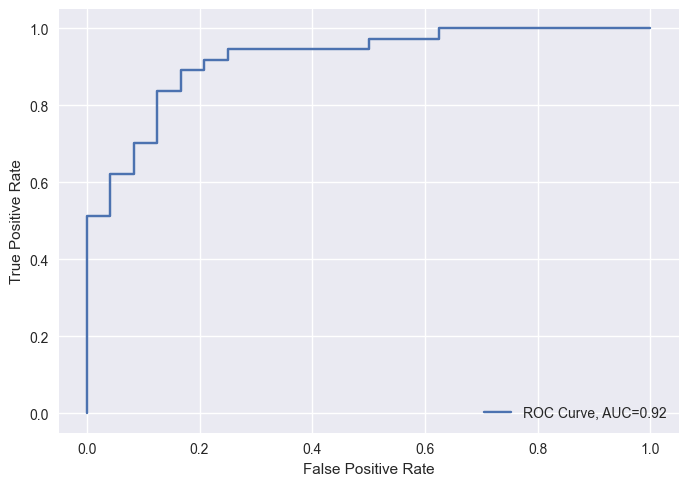

In [177]:
plt.plot(fpr, tpr, label=(f"ROC Curve, AUC={auc:.2f}"))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4);

c:\users\warrior\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


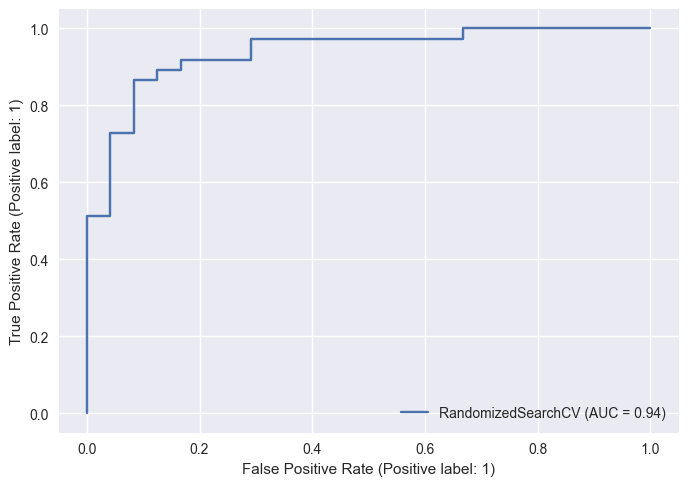

In [176]:
plot_roc_curve(rs_log_reg, X_test, y_test);

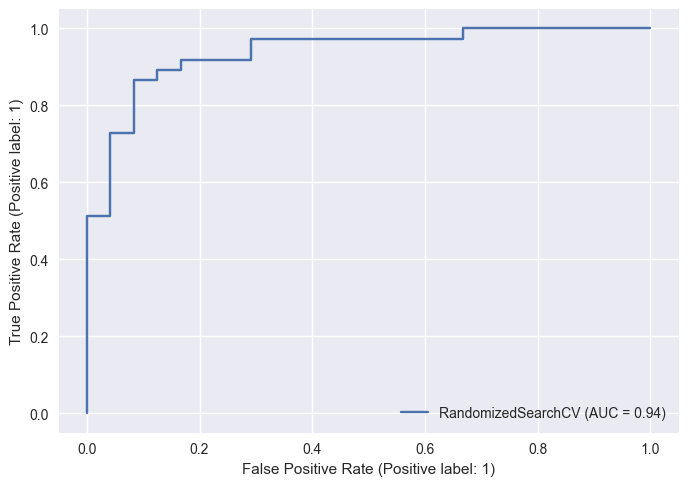

In [175]:
RocCurveDisplay.from_estimator(rs_log_reg, X_test, y_test);

In [104]:
confusion_matrix(y_test, rs_log_reg.predict(X_test))

array([[22,  2],
       [ 6, 31]], dtype=int64)

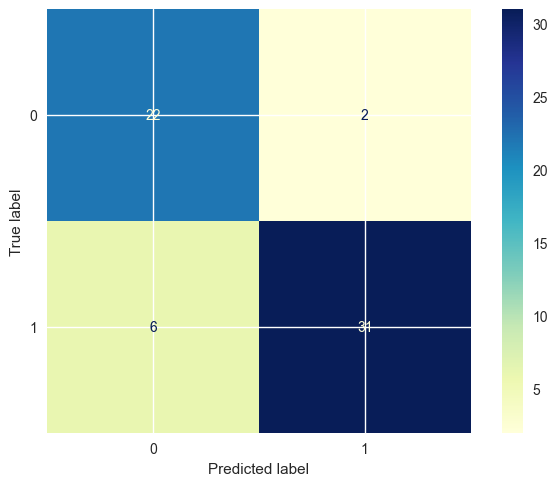

In [174]:
ConfusionMatrixDisplay.from_predictions(y_test, rs_log_reg.predict(X_test), cmap="YlGnBu");

In [119]:
print(classification_report(y_test, rs_log_reg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        24
           1       0.94      0.84      0.89        37

    accuracy                           0.87        61
   macro avg       0.86      0.88      0.87        61
weighted avg       0.88      0.87      0.87        61



In [146]:
from sklearn.model_selection import cross_val_score

new_log_reg = LogisticRegression(solver="liblinear", penalty="l1", max_iter=2500, C=0.2682695795279725)

new_log_reg.fit(X_train, y_train)

LogisticRegression(C=0.2682695795279725, max_iter=2500, penalty='l1',
                   solver='liblinear')

In [147]:
cv_acc = cross_val_score(new_log_reg, X, y, cv=5, scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8249180327868852

In [148]:
cv_precision = cross_val_score(new_log_reg, X, y, cv=5, scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8072403385251683

In [149]:
cv_recall = cross_val_score(new_log_reg, X, y, cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.8969696969696971

In [150]:
cv_f1 = cross_val_score(new_log_reg, X, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8490392664476643

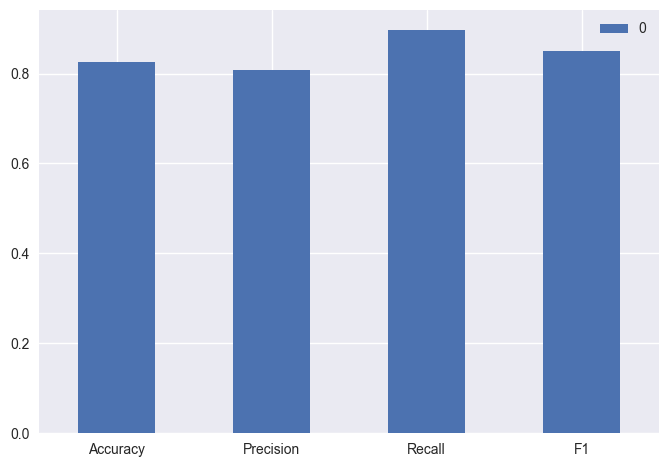

In [173]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar()
plt.xticks(rotation=0);

In [155]:
new_log_reg.coef_[0]

array([ 9.86152821e-04, -1.05394019e+00,  7.19743317e-01, -1.13929165e-02,
       -4.68507686e-03,  0.00000000e+00,  0.00000000e+00,  2.99496732e-02,
       -5.24489083e-01, -4.43576461e-01,  2.93486075e-01, -4.56863050e-01,
       -5.65530383e-01])

In [156]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [158]:
coef_dict = dict(zip(data.columns, new_log_reg.coef_[0]))

In [159]:
coef_dict

{'age': 0.0009861528206619064,
 'sex': -1.0539401904218353,
 'cp': 0.7197433174913934,
 'trestbps': -0.011392916526820483,
 'chol': -0.0046850768569266085,
 'fbs': 0.0,
 'restecg': 0.0,
 'thalach': 0.02994967321054753,
 'exang': -0.5244890832568874,
 'oldpeak': -0.44357646073805684,
 'slope': 0.2934860750491999,
 'ca': -0.4568630495194017,
 'thal': -0.5655303831407101}

In [160]:
coef_df = pd.DataFrame(coef_dict,
                       index=[0])

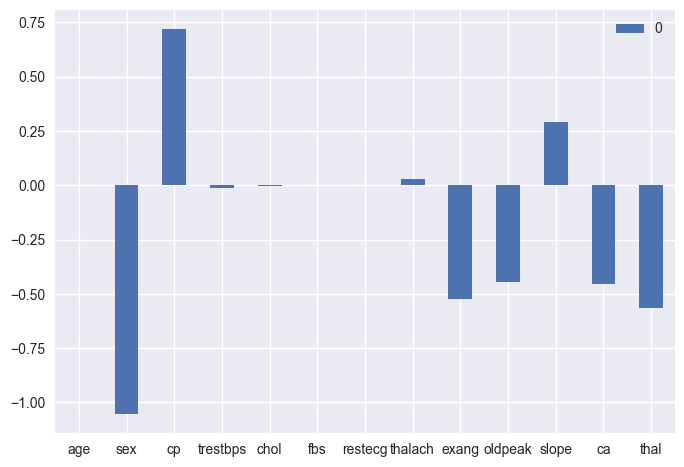

In [172]:
coef_df.T.plot.bar()
plt.xticks(rotation=0);